In [1]:
from __future__ import division, absolute_import, print_function
%load_ext autoreload
%autoreload 2

import os 
print(os.getcwd()) 
    
#import hepran
#import hepran.bzipscore as bz
#import hepran.bcipa as bc
#import hepran.utils as u
#import hepran.registers as r
#import hepran.agadir as ag

import pandas as pd
import numpy as np
import seaborn as sns
    
%matplotlib inline

import matplotlib as mpl
import matplotlib.pylab as plt

import sklearn as sk


CCO = os.environ.get("CCO",r"C:\Projekti_KI\ortoCC\CoiledCoilOrtho")
SFD = os.environ.get("SFD",r"D:\data\ortoCC\fine_tune_scoring_function\sets")
from score_utils import *
from set_utils import *


D:\data\ortoCC\fine_tune_scoring_function


In [2]:
from interactive_set_plot import *

import bokeh
import bokeh.resources
import bokeh.plotting as bp
from bokeh.models import HoverTool
from IPython.core.display import display, HTML
import hepran
bp.output_notebook()

import sklearn
from sklearn import linear_model
from sklearn.externals import joblib

from IPython.display import display, HTML

Loading BokehJS ...

In [3]:
%%time
df = pd.read_csv('data/DNA_round0_fiting.csv', index_col=[0,1])


Wall time: 76.8 ms


In [4]:
extra_cols="RD_Tm ln_mean_RD bcnum sd_RD norm_sd_RD cv_RD".split()
fit_metrics_all =  get_metrics_df().set_index('N_iter fit_type fit_class'.split())
fit_metrics_all['OI_score'] = ''
fit_metrics_all['GAP_score'] = ''
fit_metrics_all['NAM_score'] = ''
fit_metrics_all['OI_exp'] = ''
fit_metrics_all['GAP_exp'] = ''
fit_metrics_all['NAM_exp'] = ''

In [5]:
target_field = 'Tm'
set_name = 'PNIC.bA.set'
fit_name = 'DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10'
model_out_dir = 'test_decomp'

#read ENV vars if they are set
set_name = os.environ.get('set_name', set_name)
fit_name = os.environ.get('fit_name', fit_name)
model_out_dir = os.environ.get('model_out_dir', model_out_dir)

print("set_name =", set_name)
print("fit_name =", fit_name)
print("model_out_dir =", model_out_dir)

set_name = PNIC.bA.set
fit_name = DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10
model_out_dir = test_decomp


In [6]:
##filter per set
if set_name != "ALL":
    pairs = u.load_set_file(SFD+'/'+set_name)
    ids = u.get_ids_from_pairs(pairs)
    df = df.query('(ID1 in @ids) and (ID2 in @ids)')
    
    

In [7]:
tooltips = [
    ('ID1, ID2', '@IDs'),
    ('RD_Tm', '@RD_Tm'),
    ('score', '@score'),
    ('weights', '@weights'),  
    ('ln_mean_RD', '@ln_mean_RD'),
    ('bcnum', '@bcnum'),
    ('sd_RD', '@sd_RD'),    
    ('cv_RD', '@cv_RD'),    
    ('seq1', '@seq1_disp{safe}'),
    ('seq2', '@seq2_disp{safe}'),
]


In [8]:
df = df.apply(get_CC_features, axis=1)
#df.rename(columns={'RD_Tm':'Tm'}, inplace=True)
df['Tm']=df.RD_Tm
df['norm_sd_RD'] = df.sd_RD/df.sd_RD.mean()
df['cv_RD'] = df.sd_RD/df.mean_RD
df['weights'] = 1

In [9]:
import sys
sys.executable


'C:\\bin\\python\\anaconda64\\python.exe'

corrR  \
N_iter fit_type                                       fit_class             
0      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all        0.579856   
                                                      Tm>25      0.589988   
                                                      Tm>55      0.055783   
                                                      on_target  0.465392   

                                                                 R2_score  \
N_iter fit_type                                       fit_class             
0      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all        0.140561   
                                                      Tm>25      0.132353   
                                                      Tm>55     -3.496471   
                                                      on_target -0.618759   

                                                                      RMSE  \
N_iter fit_type                                       fit_class              
0      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all         8.118351   
                                                      Tm>25       8.074308   
                                                      Tm>55      13.544978   
                                                      on_target  10.074521   

                                                                 med_abs_err  \
N_iter fit_type                                       fit_class                
0      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all           2.361120   
                                                      Tm>25         2.357234   
                                                      Tm>55         3.120768   
                                                      on_target     2.385535   

                                                                 explained_var  \
N_iter fit_type                                       fit_class                  
0      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all             0.154026   
                                                      Tm>25           0.154609   
                                                      Tm>55          -1.799314   
                                                      on_target      -0.074864   

                                                                 Baysian_IC  \
N_iter fit_type                                       fit_class               
0      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all        383.321035   
                                                      Tm>25      373.779980   
                                                      Tm>55       29.918055   
                                                      on_target   51.012988   

                                                                  Akaike_IC  \
N_iter fit_type                                       fit_class               
0      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all        692.507109   
                                                      Tm>25      672.616180   
                                                      Tm>55       44.931932   
                                                      on_target   64.470672   

                                                                N_samples  \
N_iter fit_type                                       fit_class             
0      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all              78   
                                                      Tm>25            76   
                                                      Tm>55             3   
                                                      on_target         6   

                                                                N_feat  \
N_iter fit_type                                       fit_class          
0      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all           13   
                                                      Tm>25     

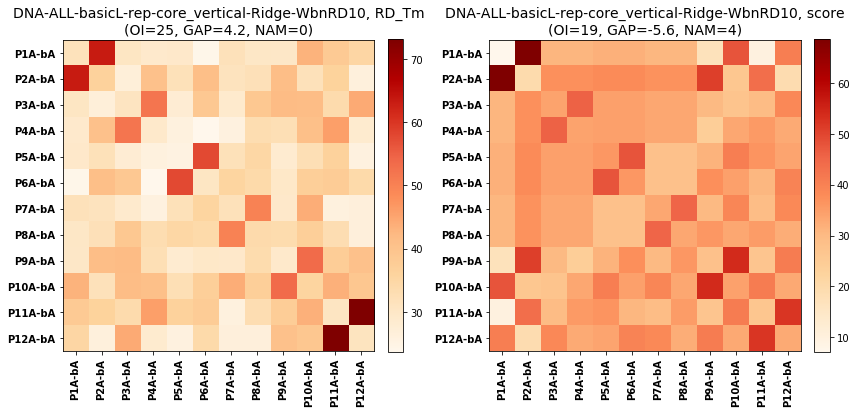

In [10]:
def do_plots(aiter, do_score_overlap=False):
    #load model 
    global fit_metrics_all
    global df
    global N_iter
    global lm
    global fit_fields
    global model_features_all
    N_iter = aiter
    model_features_all = pd.read_csv('{model_out_dir}/{fit_name}.features.csv'.format(**globals()), index_col=[0,1])
    fit_fields = model_features_all.loc[N_iter]['feature'].values
    lm = joblib.load('{model_out_dir}/{N_iter}_{fit_name}.model'.format(**globals()))
    if not do_score_overlap:
        df['score'] = lm.predict(df[fit_fields])
        df['pos'] = 0
        Q = df
    else:
        Q = score_overlap(df, lm, fit_fields, get_CC_features)
    
    
    Q = Q.apply(get_formated_seq, axis=1)
    Q['IDs']=Q.index
    title = fit_name
    #bp.output_file(title=title, filename='models\\{title}.plot.html'.format(**locals()))
    p = draw_scatter_interactive(target_field, 'score', Q, y_range=(0,80),                                
                                     title=title, save_to_file=False, tooltips=tooltips, width=450, height=450)


    
    ##show model table
    from bokeh.models.widgets import DataTable, NumberFormatter, TableColumn
    columns = [
            TableColumn(field="feature", title="Feature"),
            TableColumn(field="coef", title="Coeficients", formatter=NumberFormatter(format='+0.000')),
        ]
    model_feat = DataTable(source=bp.ColumnDataSource(model_features_all.loc[N_iter]),
                                                columns = columns,
                                                width=400, height=450)

    bp.show(
        bokeh.layouts.row(
            p,
            bokeh.layouts.widgetbox(model_feat),

        ))
    
    
    fit_metric = get_FIT_dataframe(Q, lm, N_iter, fit_name, N_feat=len(lm.coef_)+1, N_samples=len(Q))

    
    

    fig, axs = plt.subplots(1,2,figsize=[12,8])
    ax, OI, GAP, NAM = plot_orto_set(Q, ids, title=title, field="RD_Tm", pairs=pairs, ax=axs[0])
    fit_metric['OI_exp'] = OI
    fit_metric['GAP_exp'] = GAP
    fit_metric['NAM_exp'] = NAM
    
    ax, OI, GAP, NAM = plot_orto_set(Q, ids, title=title, field="score", pairs=pairs, ax=axs[1])
    fit_metric['OI_mod'] = OI
    fit_metric['GAP_mod'] = GAP
    fit_metric['NAM_mod'] = NAM
    
    
    fit_metric['set'] = set_name
    fit_metrics_all = fit_metrics_all.append(fit_metric, sort=False)
    display(fit_metric)
    
do_plots(0, do_score_overlap=False)    

corrR  \
N_iter fit_type                                       fit_class             
1      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all        0.626106   
                                                      Tm>25      0.629394   
                                                      Tm>55      0.033129   
                                                      on_target  0.446312   

                                                                 R2_score  \
N_iter fit_type                                       fit_class             
1      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all        0.264316   
                                                      Tm>25      0.250414   
                                                      Tm>55     -3.422861   
                                                      on_target -0.568319   

                                                                      RMSE  \
N_iter fit_type                                       fit_class              
1      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all         7.511140   
                                                      Tm>25       7.504894   
                                                      Tm>55      13.433650   
                                                      on_target   9.916321   

                                                                 med_abs_err  \
N_iter fit_type                                       fit_class                
1      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all           2.238158   
                                                      Tm>25         2.190726   
                                                      Tm>55         3.038980   
                                                      on_target     2.214249   

                                                                 explained_var  \
N_iter fit_type                                       fit_class                  
1      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all             0.272551   
                                                      Tm>25           0.264171   
                                                      Tm>55          -1.644883   
                                                      on_target      -0.051065   

                                                                 Baysian_IC  \
N_iter fit_type                                       fit_class               
1      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all        371.193624   
                                                      Tm>25      362.663954   
                                                      Tm>55       29.868536   
                                                      on_target   50.823057   

                                                                  Akaike_IC  \
N_iter fit_type                                       fit_class               
1      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all        680.379697   
                                                      Tm>25      661.500155   
                                                      Tm>55       44.882414   
                                                      on_target   64.280741   

                                                                N_samples  \
N_iter fit_type                                       fit_class             
1      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all              78   
                                                      Tm>25            76   
                                                      Tm>55             3   
                                                      on_target         6   

                                                                N_feat  \
N_iter fit_type                                       fit_class          
1      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all           13   
                                                      Tm>25     

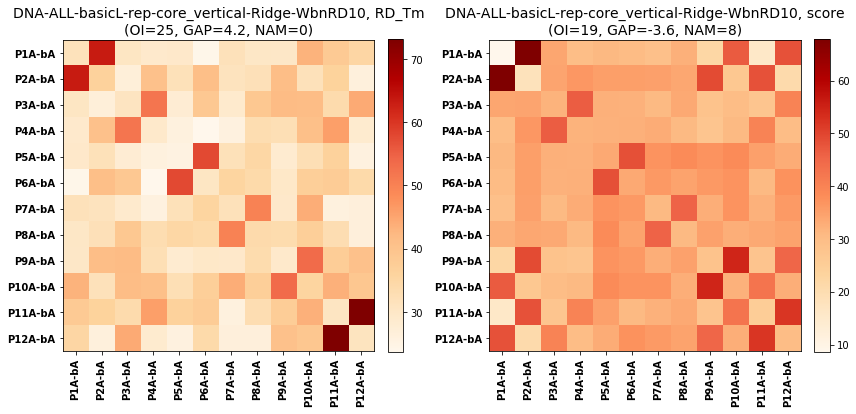

In [11]:
do_plots(1, do_score_overlap=True)

corrR  \
N_iter fit_type                                       fit_class             
2      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all        0.625934   
                                                      Tm>25      0.629055   
                                                      Tm>55      0.036469   
                                                      on_target  0.443691   

                                                                 R2_score  \
N_iter fit_type                                       fit_class             
2      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all        0.252038   
                                                      Tm>25      0.235562   
                                                      Tm>55     -3.421989   
                                                      on_target -0.558646   

                                                                      RMSE  \
N_iter fit_type                                       fit_class              
2      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all         7.573559   
                                                      Tm>25       7.578876   
                                                      Tm>55      13.432326   
                                                      on_target   9.885692   

                                                                 med_abs_err  \
N_iter fit_type                                       fit_class                
2      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all           2.268282   
                                                      Tm>25         2.246808   
                                                      Tm>55         3.043991   
                                                      on_target     2.268282   

                                                                 explained_var  \
N_iter fit_type                                       fit_class                  
2      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all             0.268371   
                                                      Tm>25           0.259434   
                                                      Tm>55          -1.753024   
                                                      on_target      -0.078416   

                                                                 Baysian_IC  \
N_iter fit_type                                       fit_class               
2      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all        372.484650   
                                                      Tm>25      364.155005   
                                                      Tm>55       29.867945   
                                                      on_target   50.785935   

                                                                  Akaike_IC  \
N_iter fit_type                                       fit_class               
2      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all        681.670723   
                                                      Tm>25      662.991206   
                                                      Tm>55       44.881822   
                                                      on_target   64.243619   

                                                                N_samples  \
N_iter fit_type                                       fit_class             
2      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all              78   
                                                      Tm>25            76   
                                                      Tm>55             3   
                                                      on_target         6   

                                                                N_feat  \
N_iter fit_type                                       fit_class          
2      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all           13   
                                                      Tm>25     

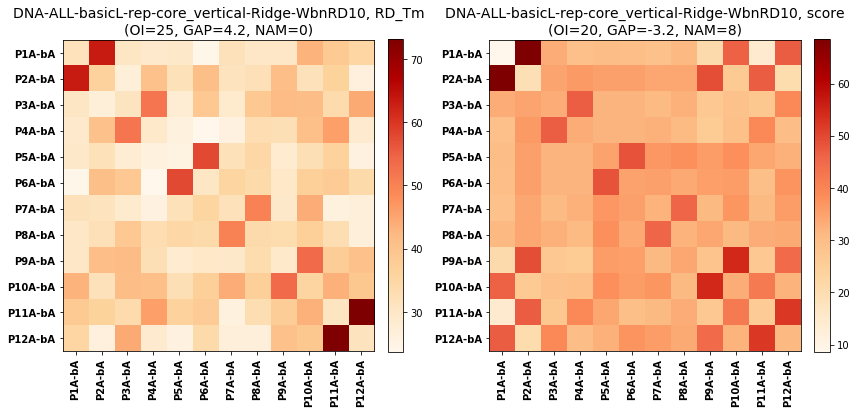

In [12]:
do_plots(2, do_score_overlap=True)

corrR  \
N_iter fit_type                                       fit_class             
3      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all        0.623591   
                                                      Tm>25      0.626794   
                                                      Tm>55      0.040415   
                                                      on_target  0.447324   

                                                                 R2_score  \
N_iter fit_type                                       fit_class             
3      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all        0.246200   
                                                      Tm>25      0.229558   
                                                      Tm>55     -3.394345   
                                                      on_target -0.550345   

                                                                      RMSE  \
N_iter fit_type                                       fit_class              
3      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all         7.603061   
                                                      Tm>25       7.608579   
                                                      Tm>55      13.390274   
                                                      on_target   9.859331   

                                                                 med_abs_err  \
N_iter fit_type                                       fit_class                
3      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all           2.280784   
                                                      Tm>25         2.233982   
                                                      Tm>55         3.042772   
                                                      on_target     2.280784   

                                                                 explained_var  \
N_iter fit_type                                       fit_class                  
3      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all             0.263089   
                                                      Tm>25           0.254143   
                                                      Tm>55          -1.751168   
                                                      on_target      -0.075415   

                                                                 Baysian_IC  \
N_iter fit_type                                       fit_class               
3      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all        373.091162   
                                                      Tm>25      364.749559   
                                                      Tm>55       29.849132   
                                                      on_target   50.753893   

                                                                  Akaike_IC  \
N_iter fit_type                                       fit_class               
3      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all        682.277236   
                                                      Tm>25      663.585759   
                                                      Tm>55       44.863009   
                                                      on_target   64.211577   

                                                                N_samples  \
N_iter fit_type                                       fit_class             
3      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all              78   
                                                      Tm>25            76   
                                                      Tm>55             3   
                                                      on_target         6   

                                                                N_feat  \
N_iter fit_type                                       fit_class          
3      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all           13   
                                                      Tm>25     

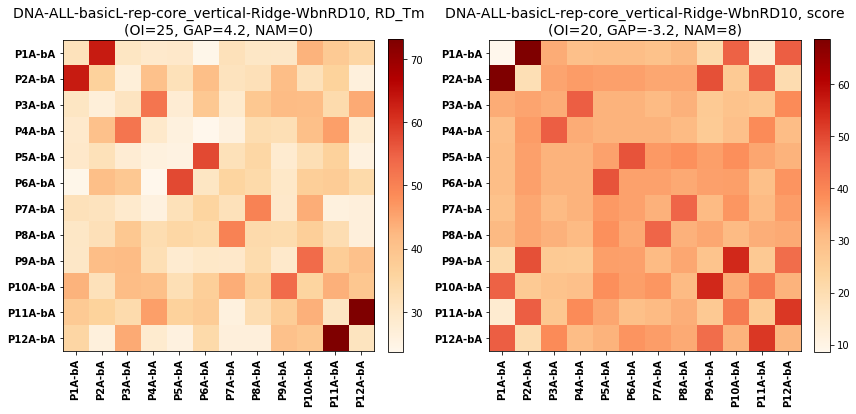

In [13]:
do_plots(3, do_score_overlap=True)

corrR  \
N_iter fit_type                                       fit_class             
4      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all        0.623413   
                                                      Tm>25      0.626659   
                                                      Tm>55      0.040399   
                                                      on_target  0.447156   

                                                                 R2_score  \
N_iter fit_type                                       fit_class             
4      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all        0.246188   
                                                      Tm>25      0.229621   
                                                      Tm>55     -3.397144   
                                                      on_target -0.551175   

                                                                      RMSE  \
N_iter fit_type                                       fit_class              
4      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all         7.603121   
                                                      Tm>25       7.608269   
                                                      Tm>55      13.394538   
                                                      on_target   9.861970   

                                                                 med_abs_err  \
N_iter fit_type                                       fit_class                
4      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all           2.284208   
                                                      Tm>25         2.232294   
                                                      Tm>55         3.043607   
                                                      on_target     2.284208   

                                                                 explained_var  \
N_iter fit_type                                       fit_class                  
4      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all             0.263063   
                                                      Tm>25           0.254205   
                                                      Tm>55          -1.757795   
                                                      on_target      -0.077170   

                                                                 Baysian_IC  \
N_iter fit_type                                       fit_class               
4      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all        373.092397   
                                                      Tm>25      364.743357   
                                                      Tm>55       29.851042   
                                                      on_target   50.757105   

                                                                  Akaike_IC  \
N_iter fit_type                                       fit_class               
4      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all        682.278471   
                                                      Tm>25      663.579558   
                                                      Tm>55       44.864919   
                                                      on_target   64.214789   

                                                                N_samples  \
N_iter fit_type                                       fit_class             
4      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all              78   
                                                      Tm>25            76   
                                                      Tm>55             3   
                                                      on_target         6   

                                                                N_feat  \
N_iter fit_type                                       fit_class          
4      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all           13   
                                                      Tm>25     

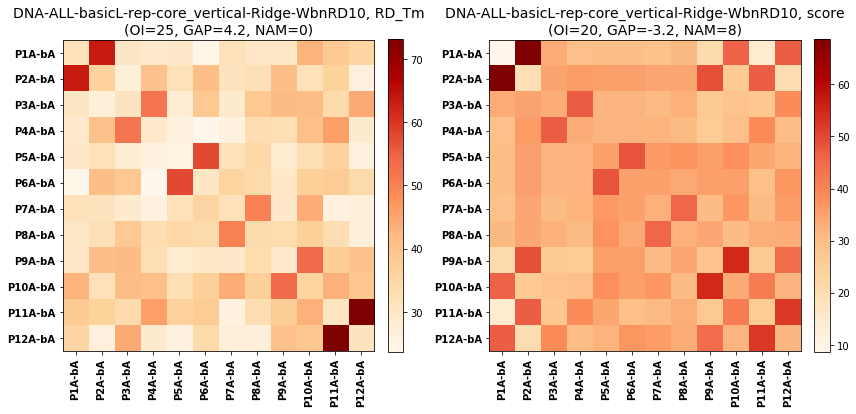

In [14]:
do_plots(4, do_score_overlap=True)

corrR  \
N_iter fit_type                                       fit_class             
5      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all        0.623413   
                                                      Tm>25      0.626659   
                                                      Tm>55      0.040399   
                                                      on_target  0.447156   

                                                                 R2_score  \
N_iter fit_type                                       fit_class             
5      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all        0.246188   
                                                      Tm>25      0.229621   
                                                      Tm>55     -3.397144   
                                                      on_target -0.551175   

                                                                      RMSE  \
N_iter fit_type                                       fit_class              
5      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all         7.603121   
                                                      Tm>25       7.608269   
                                                      Tm>55      13.394538   
                                                      on_target   9.861970   

                                                                 med_abs_err  \
N_iter fit_type                                       fit_class                
5      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all           2.284208   
                                                      Tm>25         2.232294   
                                                      Tm>55         3.043607   
                                                      on_target     2.284208   

                                                                 explained_var  \
N_iter fit_type                                       fit_class                  
5      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all             0.263063   
                                                      Tm>25           0.254205   
                                                      Tm>55          -1.757795   
                                                      on_target      -0.077170   

                                                                 Baysian_IC  \
N_iter fit_type                                       fit_class               
5      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all        373.092397   
                                                      Tm>25      364.743357   
                                                      Tm>55       29.851042   
                                                      on_target   50.757105   

                                                                  Akaike_IC  \
N_iter fit_type                                       fit_class               
5      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all        682.278471   
                                                      Tm>25      663.579558   
                                                      Tm>55       44.864919   
                                                      on_target   64.214789   

                                                                N_samples  \
N_iter fit_type                                       fit_class             
5      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all              78   
                                                      Tm>25            76   
                                                      Tm>55             3   
                                                      on_target         6   

                                                                N_feat  \
N_iter fit_type                                       fit_class          
5      DNA-ALL-basicL-rep-core_vertical-Ridge-WbnRD10 all           13   
                                                      Tm>25     

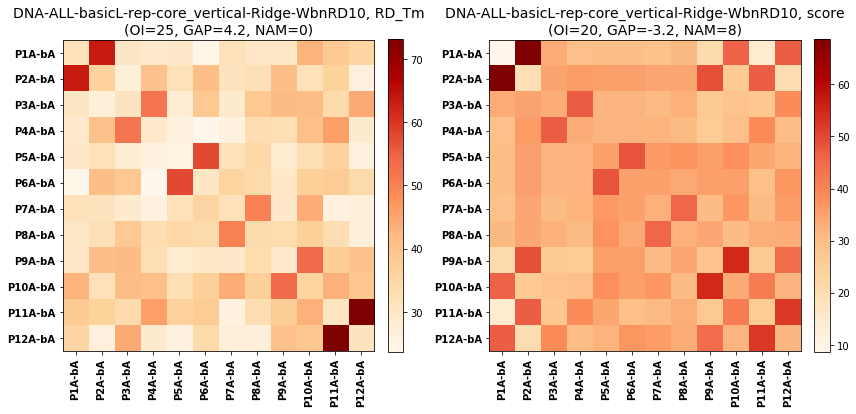

In [15]:
do_plots(5, do_score_overlap=True)

In [16]:
out_name = "SCORE_" + fit_name + "___" + set_name
fit_metrics_all.to_csv('{model_out_dir}/{out_name}.metrics.csv'.format(**locals()) ) 